In [78]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

df = pd.read_csv('eda_data.csv')
#df = df[df['Job_title_simplified']=='data scientist']

df = df[['Rating', 'Company Name', 'Location',
       'Size', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'avg_salary', 'age_of_company',
       'Job_title_simplified', 'seniority', 'R', 'python', 'power_bi',
       'tableau', 'ms_excel', 'sql', 'spark', 'aws', 'azure', 'google_cloud',
       'scraping', 'api_development', 'machine_learning', 'deep_learning',
       'statistics', 'job_description_len', 'num_comp']]
df.head()

,Rating,Company Name,Location,Size,Type of ownership,Industry,Sector,Revenue,avg_salary,age_of_company,...,aws,azure,google_cloud,scraping,api_development,machine_learning,deep_learning,statistics,job_description_len,num_comp
0,4.4,Coffee Meets Bagel,Toronto,51 to 200 employees,Company - Private,Computer Hardware & Software,Information Technology,$1 to $5 million (CAD),111.5,8,...,0,0,0,0,0,0,0,1,3599,0
1,5.0,Precision Nutrition,Toronto,51 to 200 employees,Company - Private,Education Training Services,Education,Unknown / Non-Applicable,111.5,19,...,0,0,0,0,0,0,0,0,8435,0
2,4.1,ApplyBoard,Kitchener,501 to 1000 employees,Company - Private,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,111.5,5,...,0,0,0,0,0,1,0,1,4599,0
3,4.4,McKinsey & Company,Montreal,10000+ employees,Company - Private,Consulting,Business Services,Unknown / Non-Applicable,111.5,94,...,0,0,0,0,0,1,0,0,4674,3
4,3.4,Assurance Careers,Toronto,51 to 200 employees,Company - Private,Insurance Agencies & Brokerages,Insurance,Unknown / Non-Applicable,111.5,4,...,1,0,0,0,0,0,0,1,3731,0


In [79]:
# Dummy Variable
df = pd.get_dummies(df,drop_first=True)

# train test split 
from sklearn.model_selection import train_test_split

X = df.drop('avg_salary', axis =1)
y = df.avg_salary.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 27)

In [80]:
print('X_train shape :',X_train.shape)
print('X_test shape :',X_test.shape)


X_train shape : (350, 471)
X_test shape : (88, 471)


# Machine Learning Model Building
## Cross Validation 

In [81]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits = 10, shuffle=True, random_state = 45)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = 'neg_mean_absolute_error')
    score = [r2_val_score.mean()]
    return score

In [82]:
import statsmodels.api as sm

X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     1.752
Date:                Mon, 17 Aug 2020   Prob (F-statistic):           0.000237
Time:                        18:28:15   Log-Likelihood:                -1667.5
No. Observations:                 438   AIC:                             3973.
Df Residuals:                     119   BIC:                             5275.
Df Model:                         318                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                  22.7407     22.091      1.029      0.305     -21.003      66.484
Rating                                                 -0.1592      1.587     -0.100      0.920      -3.302       2.984
age_of_company                                         -0.0999      0.064     -1.567      0.120      -0.226       0.026
R                                                      -3.3765      8.982     -0.376      0.708     -21.161      14.408
python                                                  5.6614      7.033      0.805      0.422      -8.264      19.587
power_bi                                                4.7572      9.835      0.484      0.629     -14.716      24.231
tableau                                               -10.4505      8.213     -1.272      0.206     -26.713       5.812
ms_excel                                               50.0540     19.024      2.631      0.010      12.386      87.722
sql                                                     5.9517      5.627      1.058      0.292      -5.191      17.094
spark                                                   3.0789      6.446      0.478      0.634      -9.684      15.842
aws                                                     8.8031      8.762      1.005      0.317      -8.547      26.153
azure                                                   1.1391      8.663      0.131      0.896     -16.014      18.292
google_cloud                                           13.1260     13.525      0.970      0.334     -13.656      39.907
scraping                                             4.154e-13   2.83e-11      0.015      0.988   -5.57e-11    5.65e-11
api_development                                        19.4154     13.202      1.471      0.144      -6.726      45.557
machine_learning                                        3.5913      7.368      0.487      0.627     -10.998      18.181
deep_learning                                           4.3334      8.542      0.507      0.613     -12.581      21.247
statistics                                              5.1911      6.737      0.771      0.442      -8.149      18.531
job_description_len                                     0.0013      0.002      0.582      0.562      -0.003       0.006
num_comp                                               -0.4860      1.683     -0.289      0.773      -3.818       2.846
Company Name_7-Eleven Canada                           37.3321     10.800      3.457      0.001      15.947      58.717
Company Name_7x Powered Inc.                          -11.5399     11.754     -0.982      0.328     -34.813      11.734
Company Name_AIR MI                                    -6.4288     13.799     -0.46

In [83]:
# Linear Regresssion
import sklearn.linear_model as linear_model
LR = linear_model.LinearRegression()
test_model(LR) 

[-2223827015.0235596]

In [84]:
rdg = linear_model.Ridge()
test_model(rdg)

[-21.071748919446392]

In [85]:
lasso = linear_model.Lasso(alpha=1e-4,normalize = True )
test_model(lasso);

C:\Users\kaira\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 830.7548398539875, tolerance: 20.474088571428577
  positive)
C:\Users\kaira\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1008.1108891642143, tolerance: 21.901114285714286
  positive)
C:\Users\kaira\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1991.9041860260659, tolerance: 22.166342063492067
  positive)
C:\Users\kaira\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

As Alpha = 1 ( default), it is equivalent to OLS. Lets try to find the optimum alpha and error associated with it.

,alpha,error
5,0.6,-18.700381


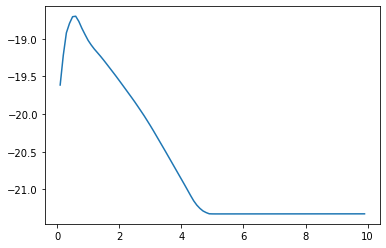

In [86]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/10)
    lml = lasso = linear_model.Lasso(alpha=(i/10))
    #Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 10)))

    
plt.plot(alpha,error)

err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

Here, we see that the error has improved slightly. Error = -18.700381 means now we are 18000 dollars off in prediction. Earier the error was around 20,000 dollars off.

In [87]:
lml = linear_model.Lasso(alpha =0.6)
lml.fit(X_train,y_train)

Lasso(alpha=0.6, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

## Support Vector Machine

In [88]:
from sklearn.svm import SVR
svr_reg = SVR(kernel='rbf', gamma = 'auto')
test_model(svr_reg)

[-20.355661254574283]

## SVM Model Bulding Hyperparameter Tuning

In [89]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
params = {'kernel': ['rbf'],
         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
         'C': [0.1, 1, 10, 100, 1000],
         'epsilon': [1, 0.2, 0.1, 0.01, 0.001, 0.0001]
          }
rand_search = RandomizedSearchCV(svr_reg, param_distributions=params, n_jobs=-1, cv=10)
rand_search.fit(X_train, y_train)
rand_search.best_score_

-0.07140222881349319

In [90]:
rand_search.best_estimator_

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [91]:
svr_reg1=SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
test_model(svr_reg1)

[-20.31060535157728]

In [92]:
svr_reg1=SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
test_model(svr_reg1)

[-21.6868776365124]

In [93]:
svr_reg1=SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
test_model(svr_reg1)

[-21.6868776365124]

# Decision Tree Regressor

In [94]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=21)
test_model(dt_reg)

[-22.18714285714286]

## Random Forest Regressor

In [95]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 1000, random_state=51)
test_model(rf_reg)

[-17.8647675345805]

### Hypertune Random Forest

In [96]:
rf = RandomForestRegressor()
parameters = {'n_estimators':range(10,250,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

rand_search = RandomizedSearchCV(rf,parameters,scoring='neg_mean_absolute_error',random_state=51, cv= 10)
rand_search.fit(X_train,y_train)

rand_search.best_score_

-17.39324285714286

In [97]:
rand_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=150,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

## Test ensemble models

In [98]:
t_pred_rf = rand_search.best_estimator_.predict(X_test)
tpred_lml = lml.predict(X_test)

## Calculating mean absolute error

In [99]:
from sklearn.metrics import mean_absolute_error
mae_lml = mean_absolute_error(y_test,tpred_lml)
mae_lml

19.34848487851468

In [100]:
mae_rf= mean_absolute_error(y_test,t_pred_rf)
mae_rf

17.60926136363636

We can see Random Forest is giving us better results

In [101]:
# Checking emsemble models
mae_ens = mean_absolute_error(y_test,(t_pred_rf+tpred_lml)/2)
mae_ens

17.698833586221976

## Pickle the model

In [102]:
import pickle
pickl = {'model': rand_search.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

In [103]:
## Test if the pickled model works
file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']
  
# Test the first prediction
model.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))[0]

85.16166666666666

In [104]:
# Save this as a data_imput file to test api

In [105]:
list(X_test.iloc[1,:])

[4.0,
 31.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 7715.0,
 3.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
